DASC 2103
Group Project: Speed dating
Authors: Matthew Edwards, Thomas Burns and Toni Beatty
Due: 02 May 2023

Central Question: What trait, or traits, are most likely to result in a match during the selection of potential partners in speed dating?

In [7]:
# Import 
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import make_pipeline
from statsmodels.formula.api import ols
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import linear_model
from numpy import mean
from numpy import std
from numpy import absolute

In [8]:
pd.options.display.max_rows = 999

In [9]:
# Load data
df = pd.read_csv("speeddating.csv")

# drop has_null column - contains no useful data
df.drop(['has_null'], axis=1, inplace = True)

# look at data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Columns: 122 entries, wave to match
dtypes: float64(59), object(63)
memory usage: 7.8+ MB


In [10]:
# examine dataframe
df.head(10)

,wave,gender,age,age_o,d_age,d_d_age,race,race_o,samerace,importance_same_race,...,d_expected_num_interested_in_me,d_expected_num_matches,like,guess_prob_liked,d_like,d_guess_prob_liked,met,decision,decision_o,match
0,1.0,b'female',21.0,27.0,6.0,b'[4-6]',b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',2.0,...,b'[0-3]',b'[3-5]',7.0,6.0,b'[6-8]',b'[5-6]',0.0,b'1',b'0',b'0'
1,1.0,b'female',21.0,22.0,1.0,b'[0-1]',b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',2.0,...,b'[0-3]',b'[3-5]',7.0,5.0,b'[6-8]',b'[5-6]',1.0,b'1',b'0',b'0'
2,1.0,b'female',21.0,22.0,1.0,b'[0-1]',b'Asian/Pacific Islander/Asian-American',b'Asian/Pacific Islander/Asian-American',b'1',2.0,...,b'[0-3]',b'[3-5]',7.0,NaN,b'[6-8]',b'[0-4]',1.0,b'1',b'1',b'1'
3,1.0,b'female',21.0,23.0,2.0,b'[2-3]',b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',2.0,...,b'[0-3]',b'[3-5]',7.0,6.0,b'[6-8]',b'[5-6]',0.0,b'1',b'1',b'1'
4,1.0,b'female',21.0,24.0,3.0,b'[2-3]',b'Asian/Pacific Islander/Asian-American',b'Latino/Hispanic American',b'0',2.0,...,b'[0-3]',b'[3-5]',6.0,6.0,b'[6-8]',b'[5-6]',0.0,b'1',b'1',b'1'
5,1.0,b'female',21.0,25.0,4.0,b'[4-6]',b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',2.0,...,b'[0-3]',b'[3-5]',6.0,5.0,b'[6-8]',b'[5-6]',0.0,b'0',b'1',b'0'
6,1.0,b'female',21.0,30.0,9.0,b'[7-37]',b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',2.0,...,b'[0-3]',b'[3-5]',6.0,5.0,b'[6-8]',b'[5-6]',0.0,b'1',b'0',b'0'
7,1.0,b'female',21.0,27.0,6.0,b'[4-6]',b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',2.0,...,b'[0-3]',b'[3-5]',6.0,7.0,b'[6-8]',b'[7-10]',NaN,b'0',b'0',b'0'
8,1.0,b'female',21.0,28.0,7.0,b'[7-37]',b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',2.0,...,b'[0-3]',b'[3-5]',7.0,7.0,b'[6-8]',b'[7-10]',0.0,b'1',b'1',b'1'
9,1.0,b'female',21.0,24.0,3.0,b'[2-3]',b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',2.0,...,b'[0-3]',b'[3-5]',6.0,6.0,b'[6-8]',b'[5-6]',0.0,b'1',b'0',b'0'


In [11]:
# look for null values
display(df.isnull().sum())

wave                                  0
gender                                0
age                                  95
age_o                               104
d_age                                 0
d_d_age                               0
race                                  0
race_o                                0
samerace                              0
importance_same_race                 79
importance_same_religion             79
d_importance_same_race                0
d_importance_same_religion            0
field                                 0
pref_o_attractive                    89
pref_o_sincere                       89
pref_o_intelligence                  89
pref_o_funny                         98
pref_o_ambitious                    107
pref_o_shared_interests             129
d_pref_o_attractive                   0
d_pref_o_sincere                      0
d_pref_o_intelligence                 0
d_pref_o_funny                        0
d_pref_o_ambitious                    0


In [12]:
# how many unique values in each column?
n = df.nunique(axis=0)
n

wave                                21
gender                               2
age                                 24
age_o                               24
d_age                               35
d_d_age                              4
race                                 6
race_o                               6
samerace                             2
importance_same_race                11
importance_same_religion            10
d_importance_same_race               3
d_importance_same_religion           3
field                              260
pref_o_attractive                   94
pref_o_sincere                      78
pref_o_intelligence                 65
pref_o_funny                        71
pref_o_ambitious                    82
pref_o_shared_interests             85
d_pref_o_attractive                  3
d_pref_o_sincere                     3
d_pref_o_intelligence                3
d_pref_o_funny                       3
d_pref_o_ambitious                   3
d_pref_o_shared_interests

In [13]:
# create new dataframe to remove excess characters - the leading and trailing values (b and ')
df1 = df

In [14]:
# isolate the columns that have the excess characters
b = ['gender','d_d_age','race','race_o','samerace','d_importance_same_race','d_importance_same_religion','field','d_pref_o_attractive','d_pref_o_sincere','d_pref_o_intelligence','d_pref_o_funny','d_pref_o_ambitious','d_pref_o_shared_interests','d_attractive_o','d_sinsere_o','d_intelligence_o','d_funny_o','d_ambitous_o','d_shared_interests_o','d_attractive_important','d_sincere_important','d_intellicence_important','d_funny_important','d_ambtition_important','d_shared_interests_important','d_attractive','d_sincere','d_intelligence','d_funny','d_ambition','d_attractive_partner','d_sincere_partner','d_intelligence_partner','d_funny_partner','d_ambition_partner','d_shared_interests_partner','d_sports','d_tvsports','d_exercise','d_dining','d_museums','d_art','d_hiking','d_gaming','d_clubbing','d_reading','d_tv','d_theater','d_movies','d_concerts','d_music','d_shopping','d_yoga','d_interests_correlate','d_expected_happy_with_sd_people','d_expected_num_interested_in_me','d_expected_num_matches','d_like','d_guess_prob_liked','decision','decision_o','match']

# remove the excess characers
for col in b:
    df1[col] = df1[col].str.replace("b", '')
    df1[col] = df1[col].str.replace("'", '')

In [15]:
# drop expected_num_interested_in_me because has 6500+ NaN
df1.drop(['expected_num_interested_in_me'], axis = 1, inplace = True)

# drop shared_interests_o because has 1076 NaN
df1.drop(['shared_interests_o'], axis = 1, inplace = True)

# drop shared_interests_partner because has 1067 NaN
df1.drop(['shared_interests_partner'], axis = 1, inplace = True)

# drop expected_num_matches because has 1173 NaN
df1.drop(['expected_num_matches'], axis = 1, inplace = True)


In [16]:
# create new dataframe to remove remaining NA values
df2 = df1

# drop NA values
df2.dropna(inplace = True)

# check for any remaining NA values
df2.isnull().sum()

wave                               0
gender                             0
age                                0
age_o                              0
d_age                              0
d_d_age                            0
race                               0
race_o                             0
samerace                           0
importance_same_race               0
importance_same_religion           0
d_importance_same_race             0
d_importance_same_religion         0
field                              0
pref_o_attractive                  0
pref_o_sincere                     0
pref_o_intelligence                0
pref_o_funny                       0
pref_o_ambitious                   0
pref_o_shared_interests            0
d_pref_o_attractive                0
d_pref_o_sincere                   0
d_pref_o_intelligence              0
d_pref_o_funny                     0
d_pref_o_ambitious                 0
d_pref_o_shared_interests          0
attractive_o                       0
s

In [17]:
# convert gender with one hot encoding: female = 0, male = 1
df2["gender"] = np.where(df2["gender"] == "female", 0, 1)

# convert all obj to int
# obj = ['samerace','decision','decision_o','match']
df2.samerace = df.samerace.astype(int)
df2.decision = df.decision.astype(int)
df2.decision_o = df.decision_o.astype(int)
df2.match = df.match.astype(int)

print(df2.info())
# create new dataframe for numeric values only
df3 = df2
df_cleaned = df2

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6466 entries, 0 to 8377
Columns: 118 entries, wave to match
dtypes: float64(55), int64(5), object(58)
memory usage: 5.9+ MB
None


In [18]:
df_cleaned.head()

,wave,gender,age,age_o,d_age,d_d_age,race,race_o,samerace,importance_same_race,...,d_expected_num_interested_in_me,d_expected_num_matches,like,guess_prob_liked,d_like,d_guess_prob_liked,met,decision,decision_o,match
0,1.0,0,21.0,27.0,6.0,[4-6],Asian/Pacific Islander/Asian-American,European/Caucasian-American,0,2.0,...,[0-3],[3-5],7.0,6.0,[6-8],[5-6],0.0,1,0,0
1,1.0,0,21.0,22.0,1.0,[0-1],Asian/Pacific Islander/Asian-American,European/Caucasian-American,0,2.0,...,[0-3],[3-5],7.0,5.0,[6-8],[5-6],1.0,1,0,0
3,1.0,0,21.0,23.0,2.0,[2-3],Asian/Pacific Islander/Asian-American,European/Caucasian-American,0,2.0,...,[0-3],[3-5],7.0,6.0,[6-8],[5-6],0.0,1,1,1
4,1.0,0,21.0,24.0,3.0,[2-3],Asian/Pacific Islander/Asian-American,Latino/Hispanic American,0,2.0,...,[0-3],[3-5],6.0,6.0,[6-8],[5-6],0.0,1,1,1
5,1.0,0,21.0,25.0,4.0,[4-6],Asian/Pacific Islander/Asian-American,European/Caucasian-American,0,2.0,...,[0-3],[3-5],6.0,5.0,[6-8],[5-6],0.0,0,1,0


In [19]:
# export df_cleaned as csv
speed_cleaned = df_cleaned.to_csv('df_cleaned.csv', index = True)

In [20]:
# columns with ranges
ranges = ['d_d_age','d_importance_same_race','d_importance_same_religion','d_pref_o_attractive','d_pref_o_sincere','d_pref_o_intelligence','d_pref_o_funny','d_pref_o_ambitious','d_pref_o_shared_interests','d_attractive_o','d_sinsere_o','d_intelligence_o','d_funny_o','d_ambitous_o','d_shared_interests_o','d_attractive_important','d_sincere_important','d_intellicence_important','d_funny_important','d_ambtition_important','d_shared_interests_important','d_attractive','d_sincere','d_intelligence','d_funny','d_ambition','d_attractive_partner','d_sincere_partner','d_intelligence_partner','d_funny_partner','d_ambition_partner','d_shared_interests_partner','d_sports','d_tvsports','d_exercise','d_dining','d_museums','d_art','d_hiking','d_gaming','d_clubbing','d_reading','d_tv','d_theater','d_movies','d_concerts','d_music','d_shopping','d_yoga','d_interests_correlate','d_expected_happy_with_sd_people','d_expected_num_interested_in_me','d_expected_num_matches','d_like','d_guess_prob_liked']

# columns with strings
string_col = ['race','race_o','field']

In [21]:
# remove range and string columns to run Regression analysis
for col in ranges:
    df3.drop([col], axis=1, inplace = True)

df_cleaned2 = df3
# export df_cleaned as csv
speed_cleaned2 = df_cleaned2.to_csv('df_cleaned2.csv', index = True)

for col in string_col:
    df3.drop([col], axis=1, inplace = True)

In [22]:
# export numeric as csv
speeddate_numeric = df3.to_csv('speeddate_numeric.csv', index = True)

In [23]:
# df3 is ready of Regression analysis

df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6466 entries, 0 to 8377
Data columns (total 60 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   wave                           6466 non-null   float64
 1   gender                         6466 non-null   int64  
 2   age                            6466 non-null   float64
 3   age_o                          6466 non-null   float64
 4   d_age                          6466 non-null   float64
 5   samerace                       6466 non-null   int64  
 6   importance_same_race           6466 non-null   float64
 7   importance_same_religion       6466 non-null   float64
 8   pref_o_attractive              6466 non-null   float64
 9   pref_o_sincere                 6466 non-null   float64
 10  pref_o_intelligence            6466 non-null   float64
 11  pref_o_funny                   6466 non-null   float64
 12  pref_o_ambitious               6466 non-null   f

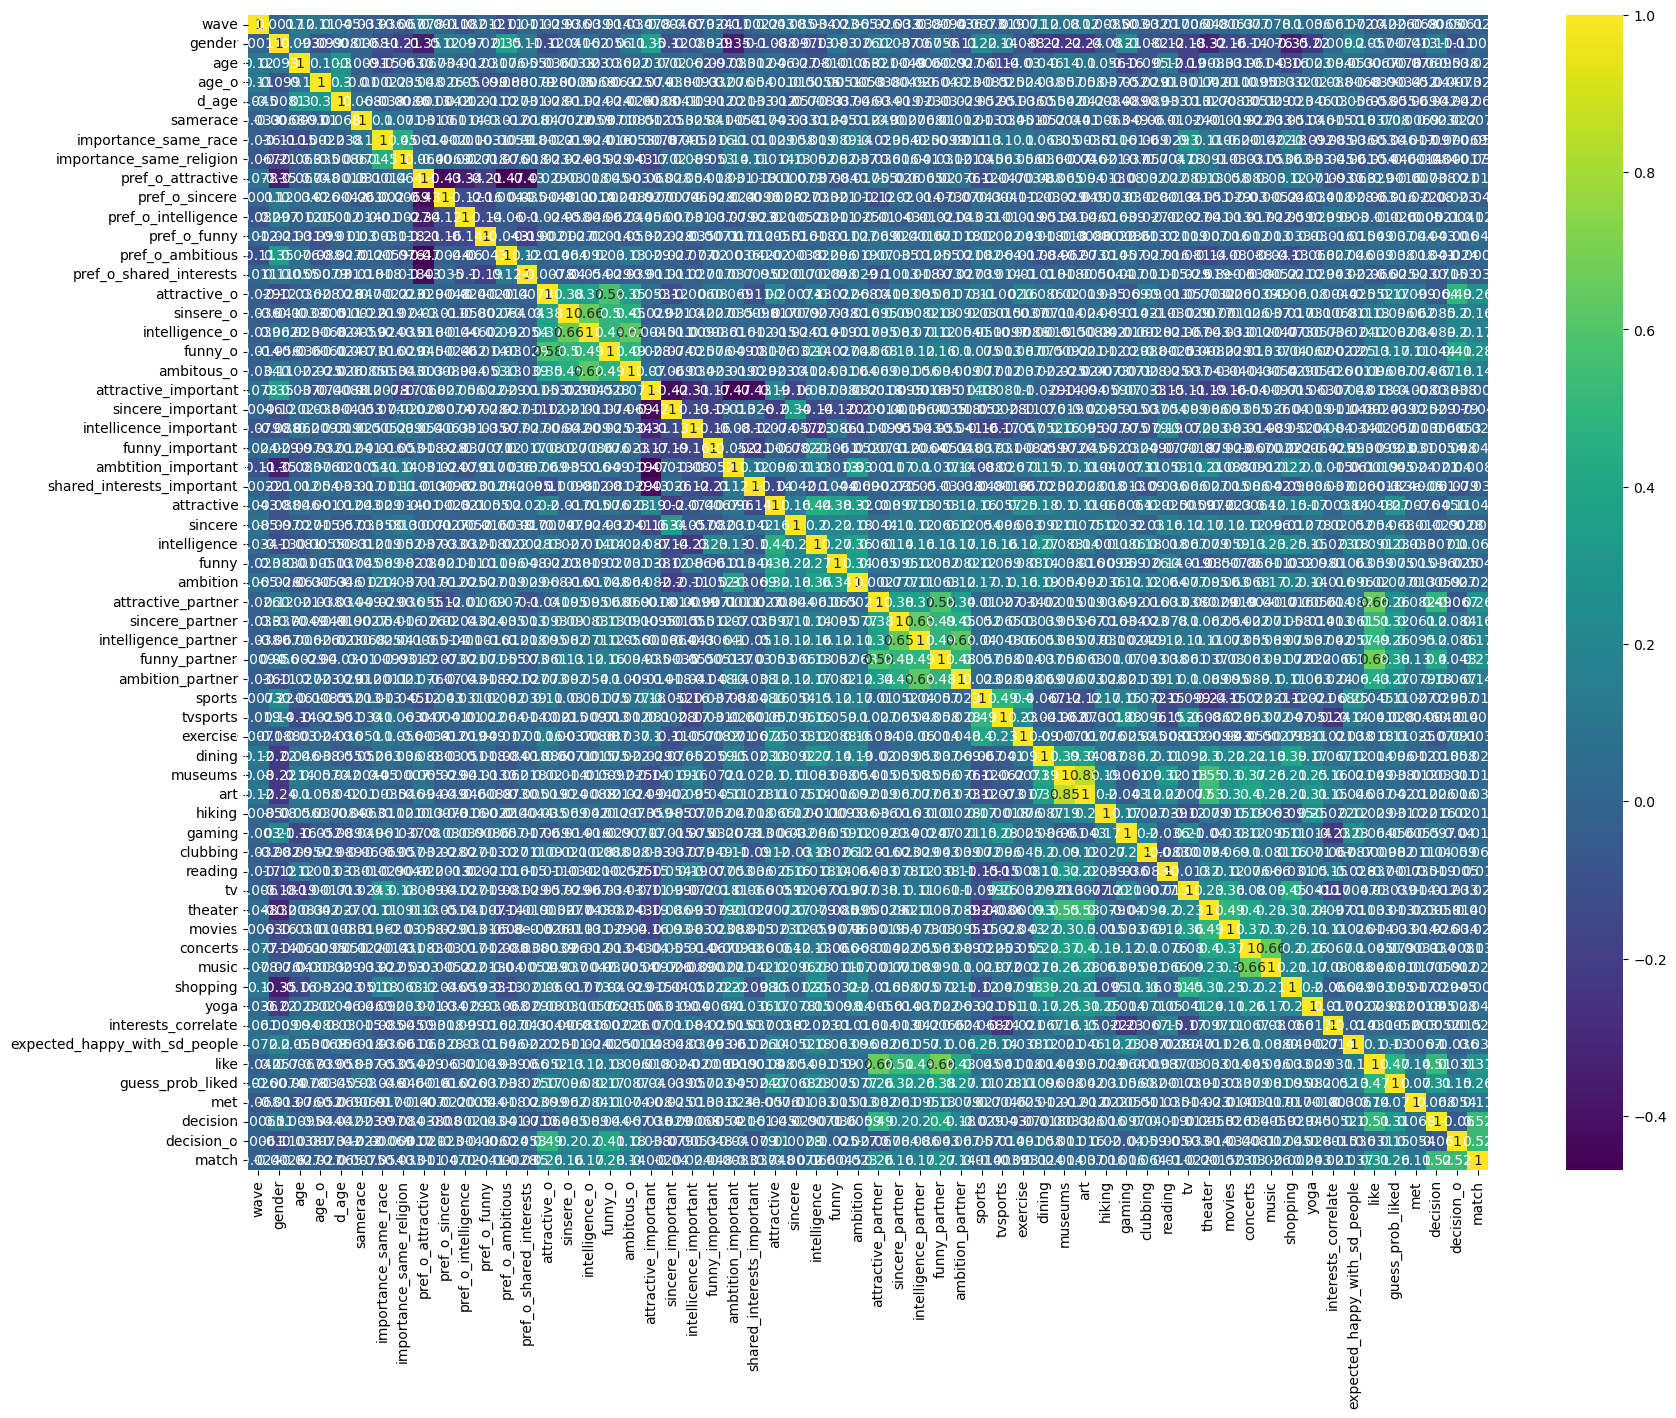

In [24]:
# heat map

plt.figure(figsize=(20,15))
sns.heatmap(df3.corr(),annot=True,cmap='viridis')

plt.savefig("output/heat_map_all.png")

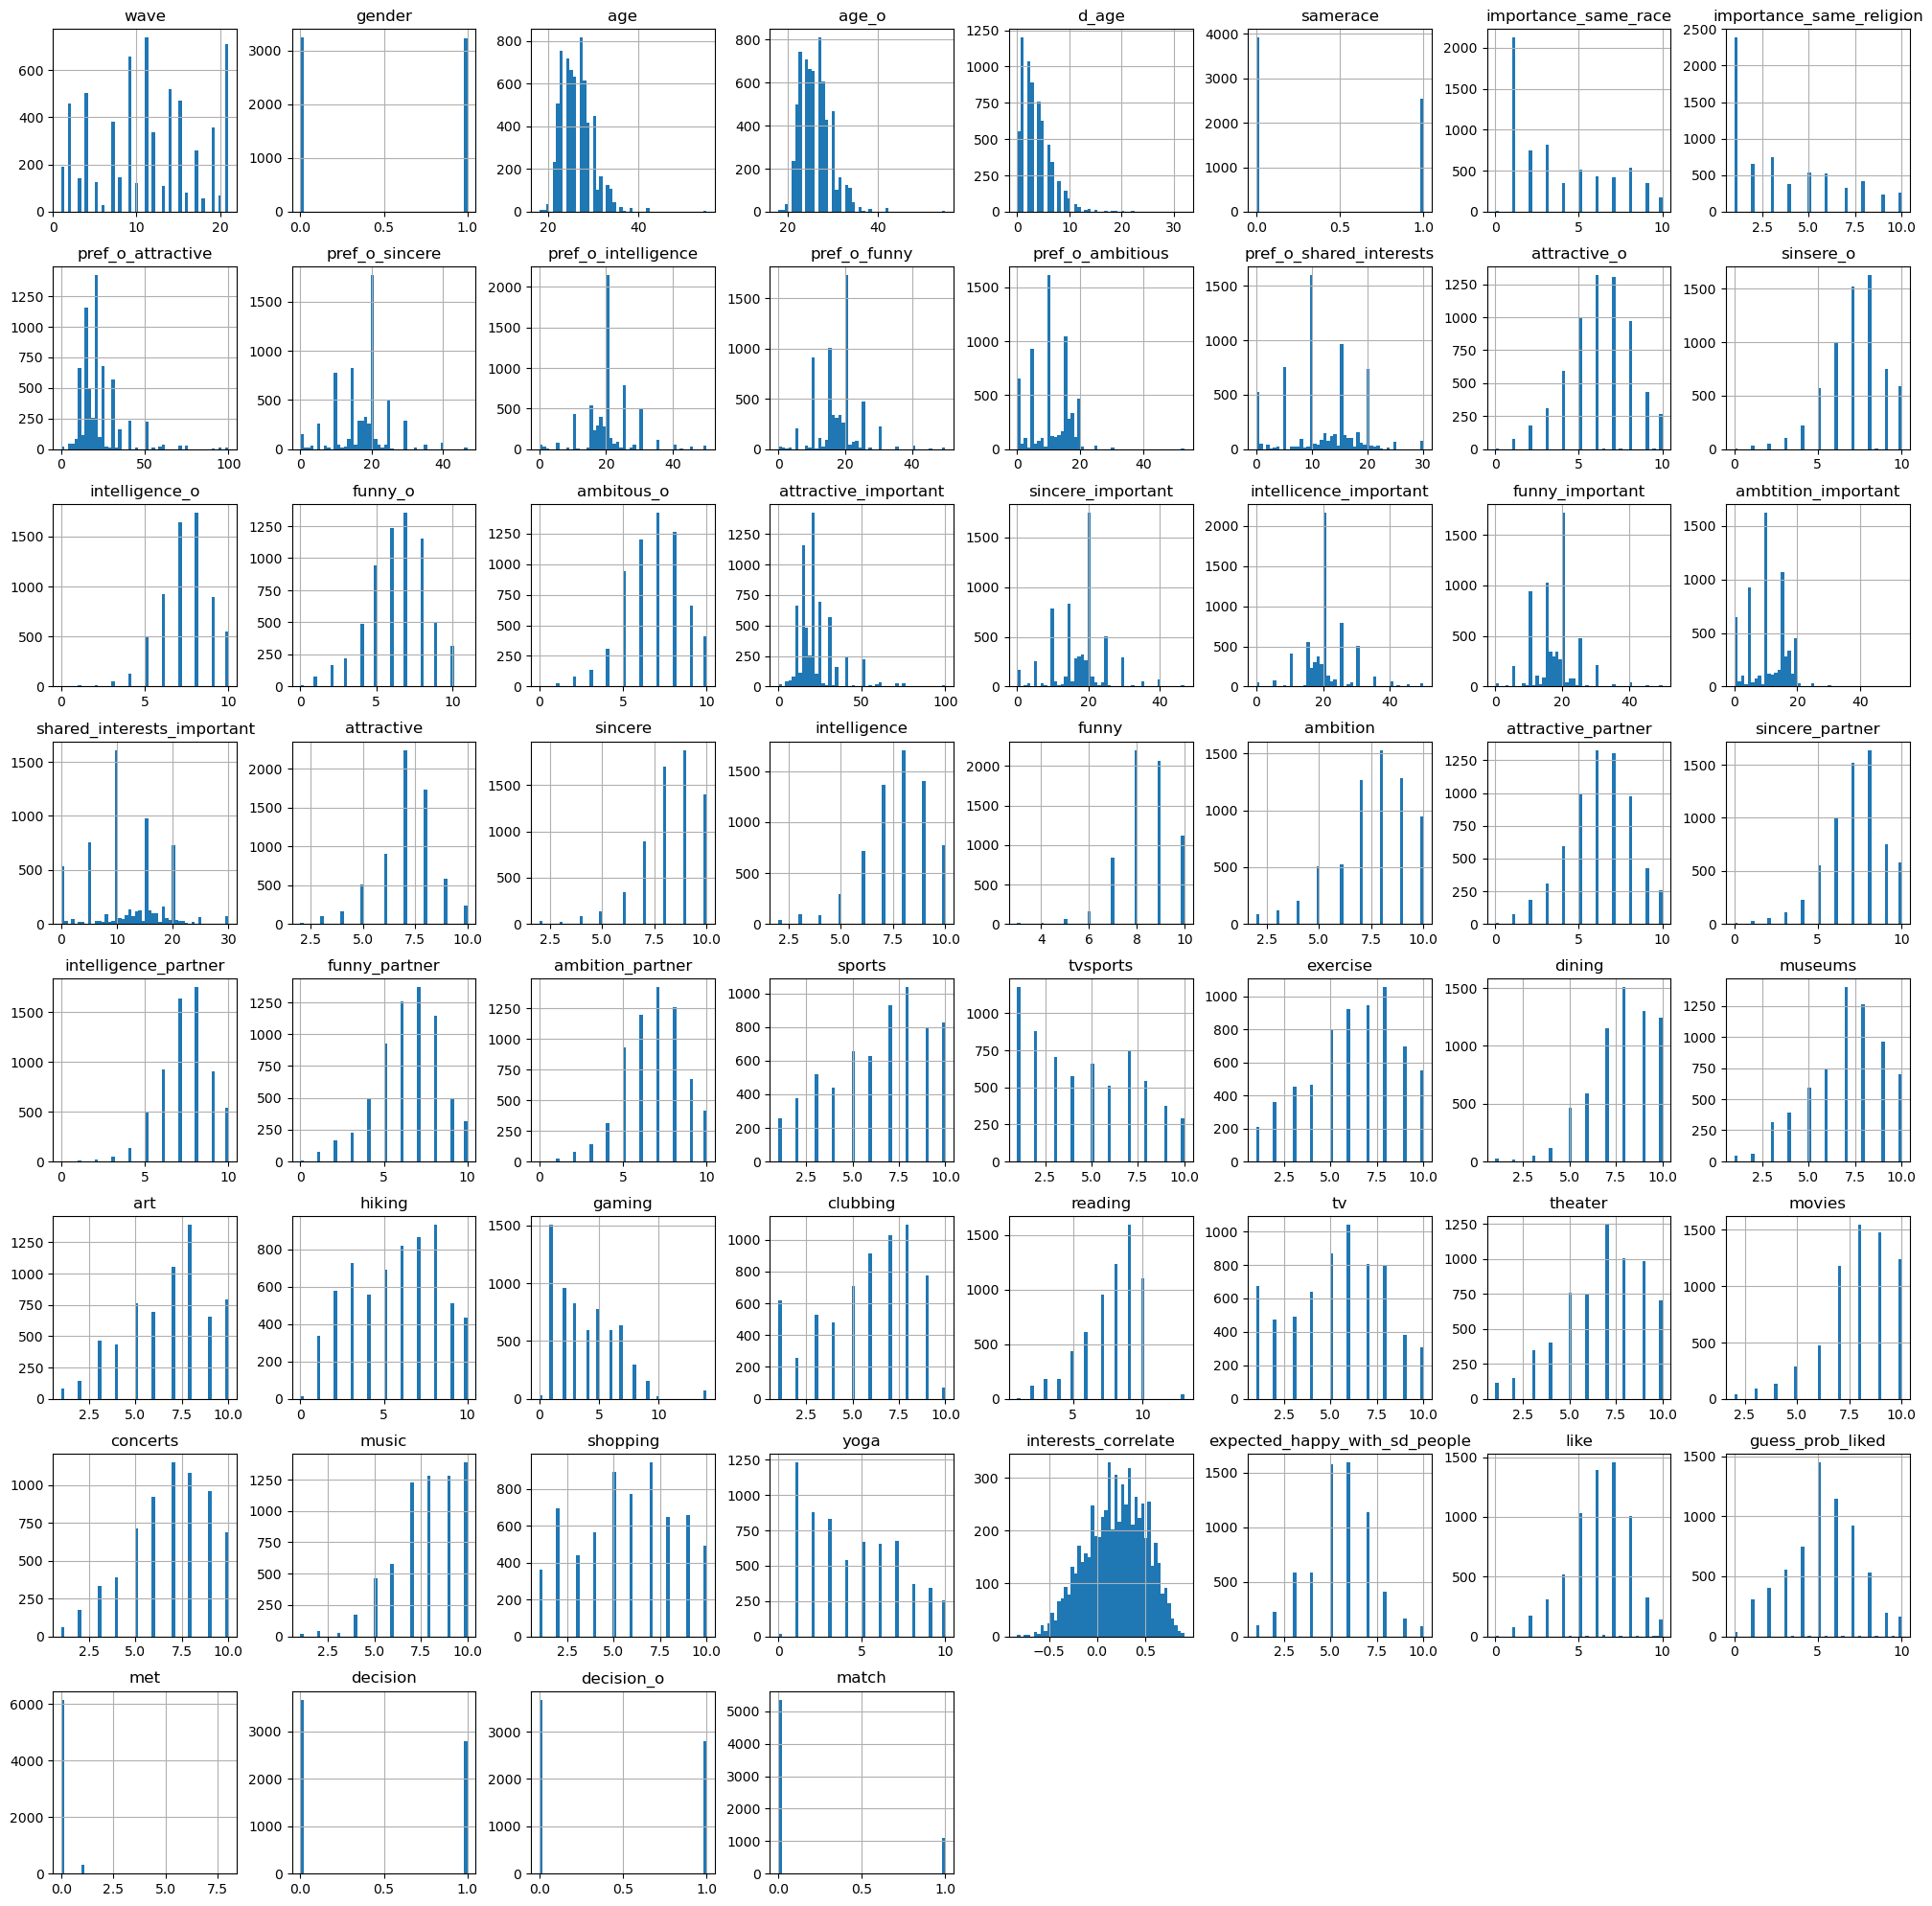

In [25]:
df3.hist(bins=50, figsize=(25,25))
plt.show()

In [26]:
df_male = df3[df3['gender'] == 1]
df_female = df3[df3['gender'] == 0]

In [27]:
# check correlation of features - all

corr_matrix = df3.corr()
corr_matrix["match"].sort_values(ascending=False)

match                            1.000000
decision_o                       0.523236
decision                         0.521919
like                             0.306889
funny_o                          0.275785
funny_partner                    0.273688
attractive_o                     0.263317
attractive_partner               0.260413
guess_prob_liked                 0.257623
intelligence_partner             0.167399
intelligence_o                   0.166289
sinsere_o                        0.164276
sincere_partner                  0.163676
ambitous_o                       0.138963
ambition_partner                 0.138313
met                              0.110671
intelligence                     0.065525
clubbing                         0.064180
attractive                       0.048158
funny_important                  0.047704
yoga                             0.042599
pref_o_funny                     0.041301
art                              0.036901
expected_happy_with_sd_people    0

In [28]:
# check correlation of features - male

corr_matrix_male = df_male.corr()
corr_matrix_male["match"].sort_values(ascending=False)

match                            1.000000
decision_o                       0.584962
decision                         0.465093
funny_o                          0.300802
like                             0.292476
attractive_o                     0.270338
guess_prob_liked                 0.262217
attractive_partner               0.257811
funny_partner                    0.246881
sinsere_o                        0.175356
intelligence_o                   0.168830
intelligence_partner             0.166587
sincere_partner                  0.151186
ambition_partner                 0.148070
ambitous_o                       0.131909
met                              0.109318
intelligence                     0.106596
attractive                       0.066784
ambition                         0.066427
clubbing                         0.055771
pref_o_funny                     0.054880
yoga                             0.053683
funny_important                  0.041162
music                            0

In [29]:
# check correlation of features - female

corr_matrix_female = df_female.corr()
corr_matrix_female["match"].sort_values(ascending=False)

match                            1.000000
decision                         0.587630
decision_o                       0.469727
like                             0.321793
funny_partner                    0.299383
attractive_partner               0.267477
attractive_o                     0.259835
guess_prob_liked                 0.253099
funny_o                          0.249630
sincere_partner                  0.175575
intelligence_partner             0.168699
intelligence_o                   0.164775
sinsere_o                        0.152585
ambitous_o                       0.148599
ambition_partner                 0.130327
met                              0.112521
clubbing                         0.073250
art                              0.057789
funny_important                  0.055899
expected_happy_with_sd_people    0.051747
concerts                         0.050424
museums                          0.036151
yoga                             0.032895
gaming                           0

In [30]:
# isolate the features that have a correlation coefficient greater than 0.1 - all

cor_target = abs(corr_matrix ["match"])#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.1]
relevant_features

attractive_o            0.263317
sinsere_o               0.164276
intelligence_o          0.166289
funny_o                 0.275785
ambitous_o              0.138963
attractive_partner      0.260413
sincere_partner         0.163676
intelligence_partner    0.167399
funny_partner           0.273688
ambition_partner        0.138313
like                    0.306889
guess_prob_liked        0.257623
met                     0.110671
decision                0.521919
decision_o              0.523236
match                   1.000000
Name: match, dtype: float64

In [31]:
# isolate the features that have a correlation coefficient greater than 0.1 - male

cor_target = abs(corr_matrix_male ["match"])#Selecting highly correlated features
relevant_features_male = cor_target[cor_target>0.1]
relevant_features_male

attractive_o            0.270338
sinsere_o               0.175356
intelligence_o          0.168830
funny_o                 0.300802
ambitous_o              0.131909
intelligence            0.106596
attractive_partner      0.257811
sincere_partner         0.151186
intelligence_partner    0.166587
funny_partner           0.246881
ambition_partner        0.148070
like                    0.292476
guess_prob_liked        0.262217
met                     0.109318
decision                0.465093
decision_o              0.584962
match                   1.000000
Name: match, dtype: float64

In [32]:
# isolate the features that have a correlation coefficient greater than 0.1 - female

cor_target = abs(corr_matrix_female ["match"])#Selecting highly correlated features
relevant_features_female = cor_target[cor_target>0.1]
relevant_features_female

attractive_o            0.259835
sinsere_o               0.152585
intelligence_o          0.164775
funny_o                 0.249630
ambitous_o              0.148599
attractive_partner      0.267477
sincere_partner         0.175575
intelligence_partner    0.168699
funny_partner           0.299383
ambition_partner        0.130327
like                    0.321793
guess_prob_liked        0.253099
met                     0.112521
decision                0.587630
decision_o              0.469727
match                   1.000000
Name: match, dtype: float64

The relevant features for males and females are the same, but the values vary.

In [33]:
# reduce number of columns based on correlation - all - smae for male and female

# convert pandas series index to list
list_features = relevant_features.index
list_feat = list_features.tolist()

# remove last element from list (match)
predictors = list_feat[:-1]
predictors

['attractive_o',
 'sinsere_o',
 'intelligence_o',
 'funny_o',
 'ambitous_o',
 'attractive_partner',
 'sincere_partner',
 'intelligence_partner',
 'funny_partner',
 'ambition_partner',
 'like',
 'guess_prob_liked',
 'met',
 'decision',
 'decision_o']

In [34]:
# dataframe of predictors - all
df4 = df3[list_feat].copy()

In [35]:
# dataframe of predictors - male
df4_male = df_male[list_feat].copy()

In [36]:
# dataframe of predictors - female
df4_female = df_female[list_feat].copy()

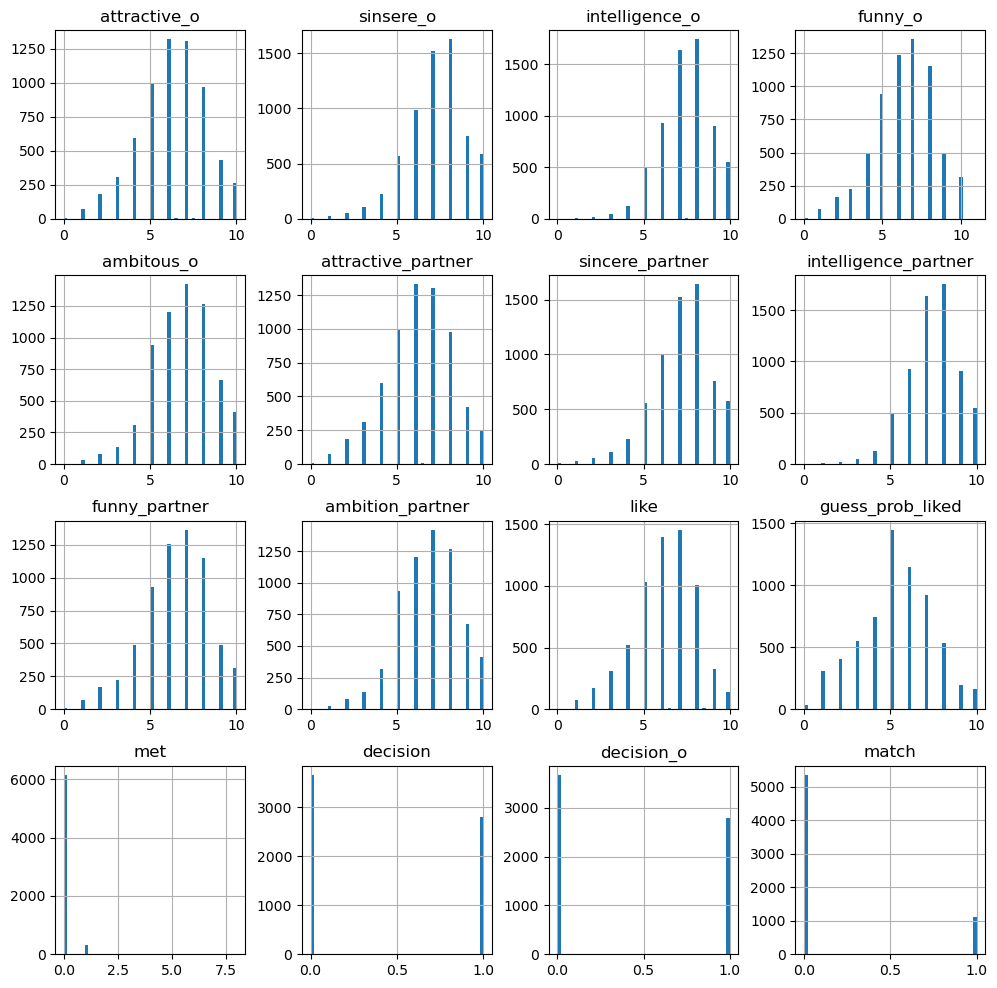

In [37]:
# check distributions of new dataframe -all

df4.hist(bins=50, figsize=(12,12))
plt.savefig("output/distributions_all.png")

plt.show()

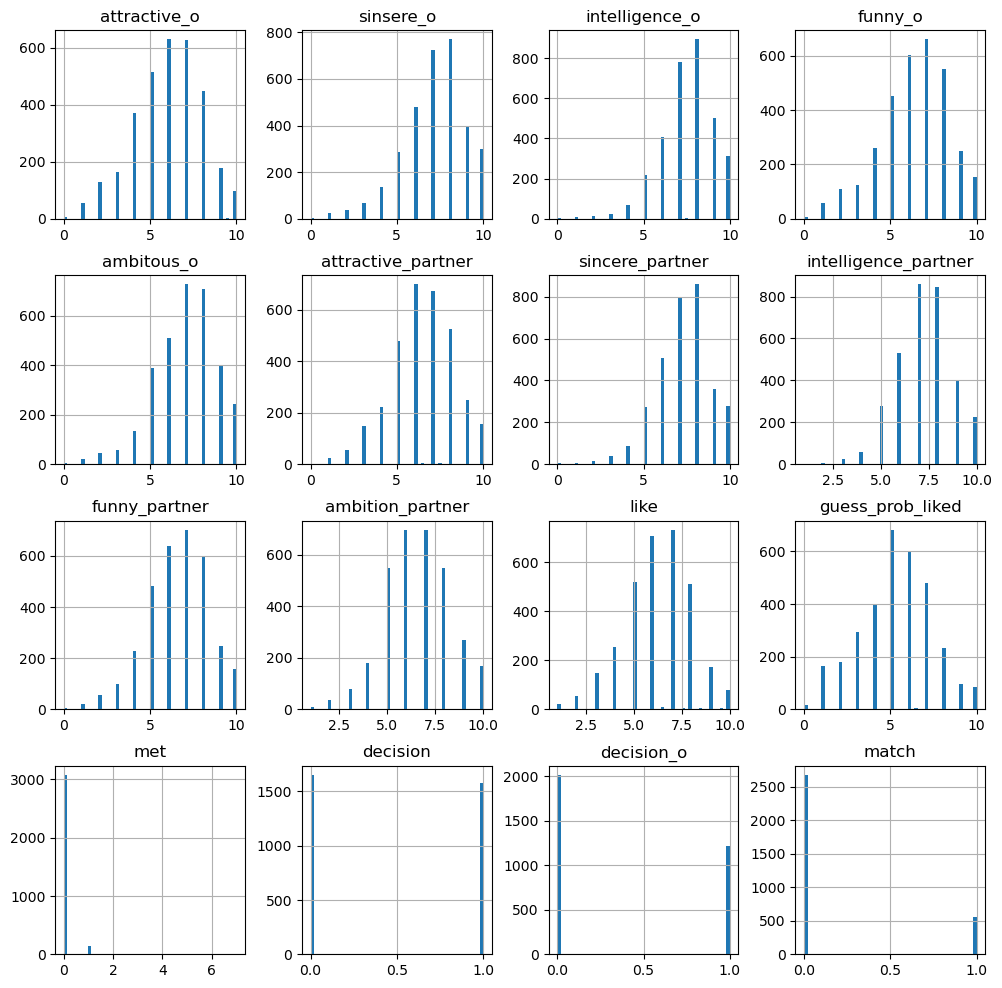

In [38]:
# check distributions of new dataframe - male

df4_male.hist(bins=50, figsize=(12,12))
plt.savefig("output/distributions_male.png")

plt.show()

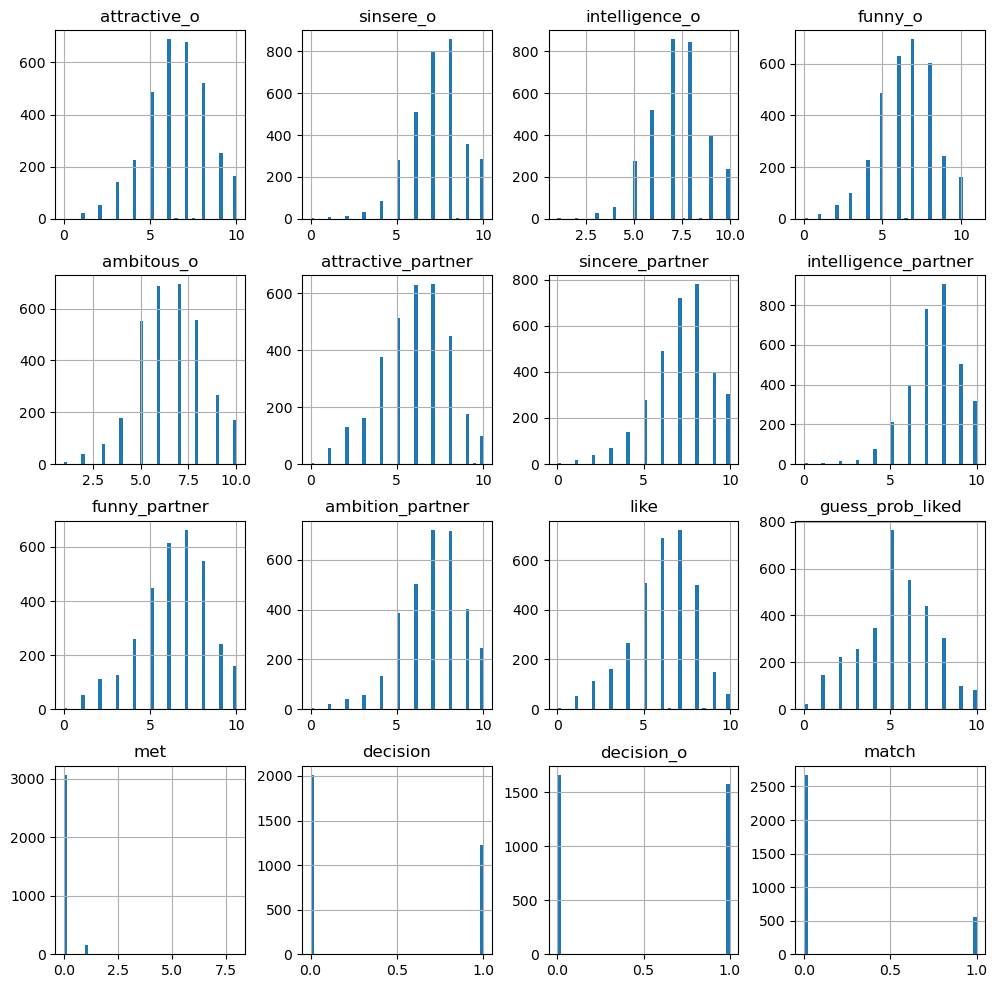

In [39]:
# check distributions of new dataframe - female

df4_female.hist(bins=50, figsize=(12,12))
plt.savefig("output/distributions_female.png")

plt.show()

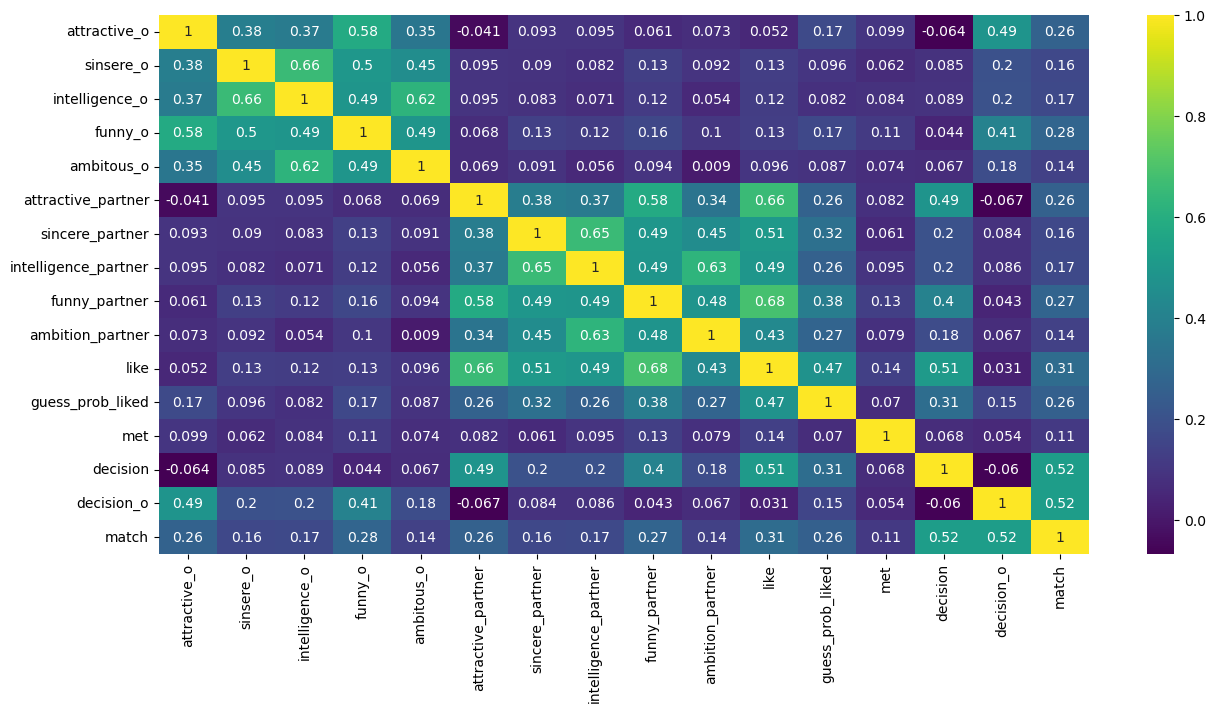

In [40]:
# heat map - all

plt.figure(figsize=(15,7))
sns.heatmap(df4.corr(),annot=True,cmap='viridis')

plt.savefig("output/heat_map_predictors_all.png")

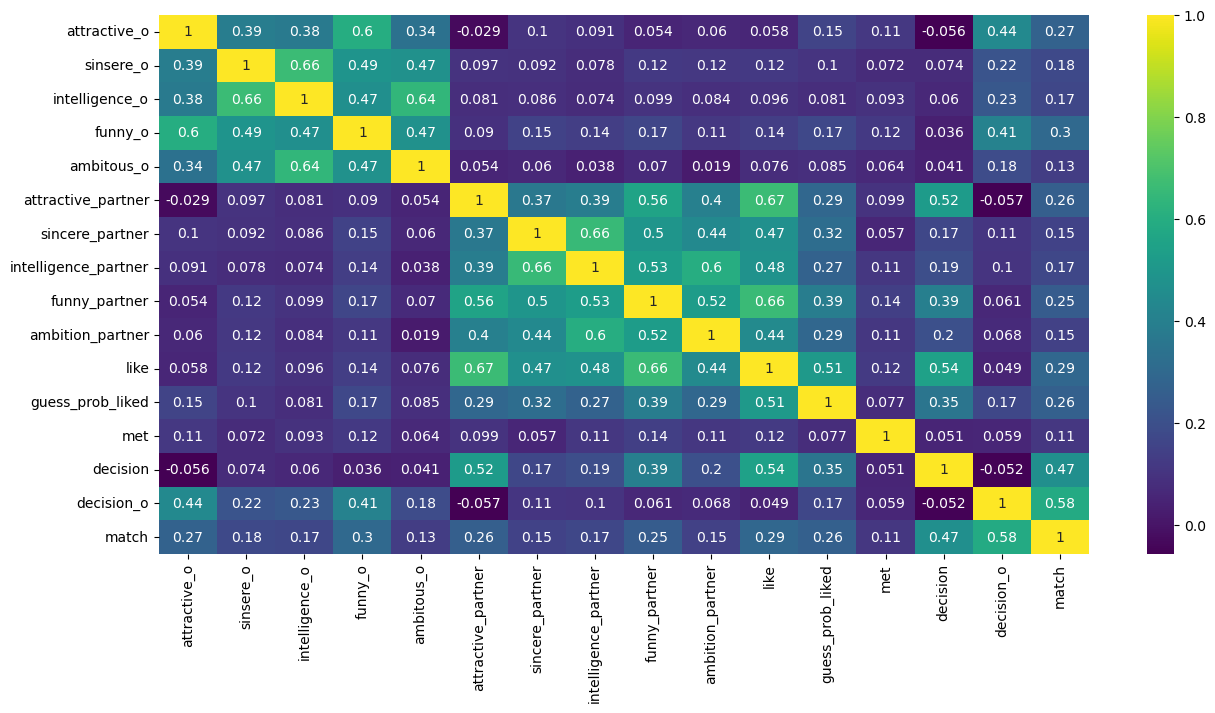

In [41]:
# heat map - male

plt.figure(figsize=(15,7))
sns.heatmap(df4_male.corr(),annot=True,cmap='viridis')

plt.savefig("output/heat_map_predictors_male.png")

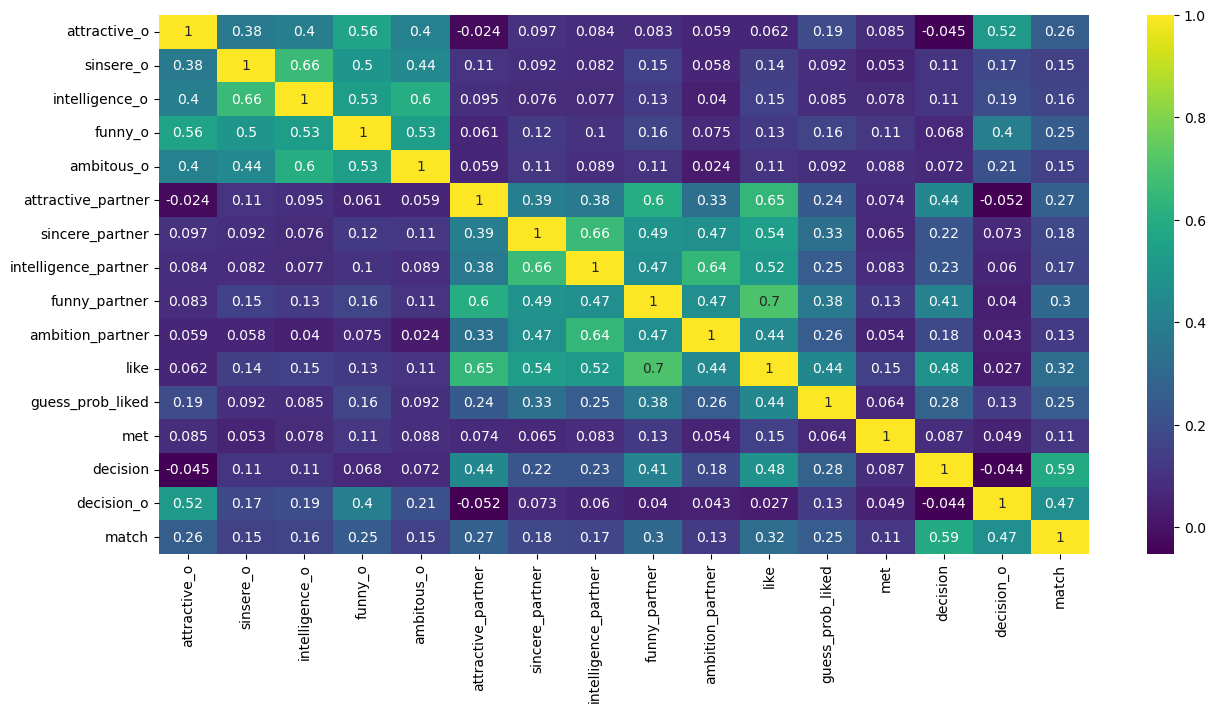

In [42]:
# heat map - female

plt.figure(figsize=(15,7))
sns.heatmap(df4_female.corr(),annot=True,cmap='viridis')

plt.savefig("output/heat_map_predictors_female.png")

We will focus on looking at the group as a whole rather than splitting into male and female groups.

In [43]:
# standardize the data

scaler = MinMaxScaler()
 
df_scaled = scaler.fit_transform(df4.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=[list_feat])
 
print("Scaled Dataset Using MinMaxScaler")
df_scaled.head()

Scaled Dataset Using MinMaxScaler


,attractive_o,sinsere_o,intelligence_o,funny_o,ambitous_o,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,like,guess_prob_liked,met,decision,decision_o,match
0,0.6,0.8,0.8,0.727273,0.8,0.6,0.9,0.7,0.7,0.6,0.7,0.6,0.000,1.0,0.0,0.0
1,0.7,0.8,1.0,0.636364,0.7,0.7,0.8,0.7,0.8,0.5,0.7,0.5,0.125,1.0,0.0,0.0
2,0.7,0.8,0.9,0.727273,0.9,0.7,0.6,0.8,0.7,0.6,0.7,0.6,0.000,1.0,1.0,1.0
3,0.8,0.7,0.9,0.545455,0.9,0.5,0.6,0.7,0.7,0.6,0.6,0.6,0.000,1.0,1.0,1.0
4,0.7,0.7,0.8,0.727273,0.7,0.4,0.9,0.7,0.4,0.6,0.6,0.5,0.000,0.0,1.0,0.0


In [44]:
#define predictor and response variables

X = df_scaled[predictors]
y = df_scaled["match"]

print(X.head())
print(y.head())

  attractive_o sinsere_o intelligence_o   funny_o ambitous_o  \
0          0.6       0.8            0.8  0.727273        0.8   
1          0.7       0.8            1.0  0.636364        0.7   
2          0.7       0.8            0.9  0.727273        0.9   
3          0.8       0.7            0.9  0.545455        0.9   
4          0.7       0.7            0.8  0.727273        0.7   

  attractive_partner sincere_partner intelligence_partner funny_partner  \
0                0.6             0.9                  0.7           0.7   
1                0.7             0.8                  0.7           0.8   
2                0.7             0.6                  0.8           0.7   
3                0.5             0.6                  0.7           0.7   
4                0.4             0.9                  0.7           0.4   

  ambition_partner like guess_prob_liked    met decision decision_o  
0              0.6  0.7              0.6  0.000      1.0        0.0  
1              0.5  0.7 

In [45]:
np.random.seed(42)

# Split into 80% train and 20% test set. 
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = .2, random_state=42)

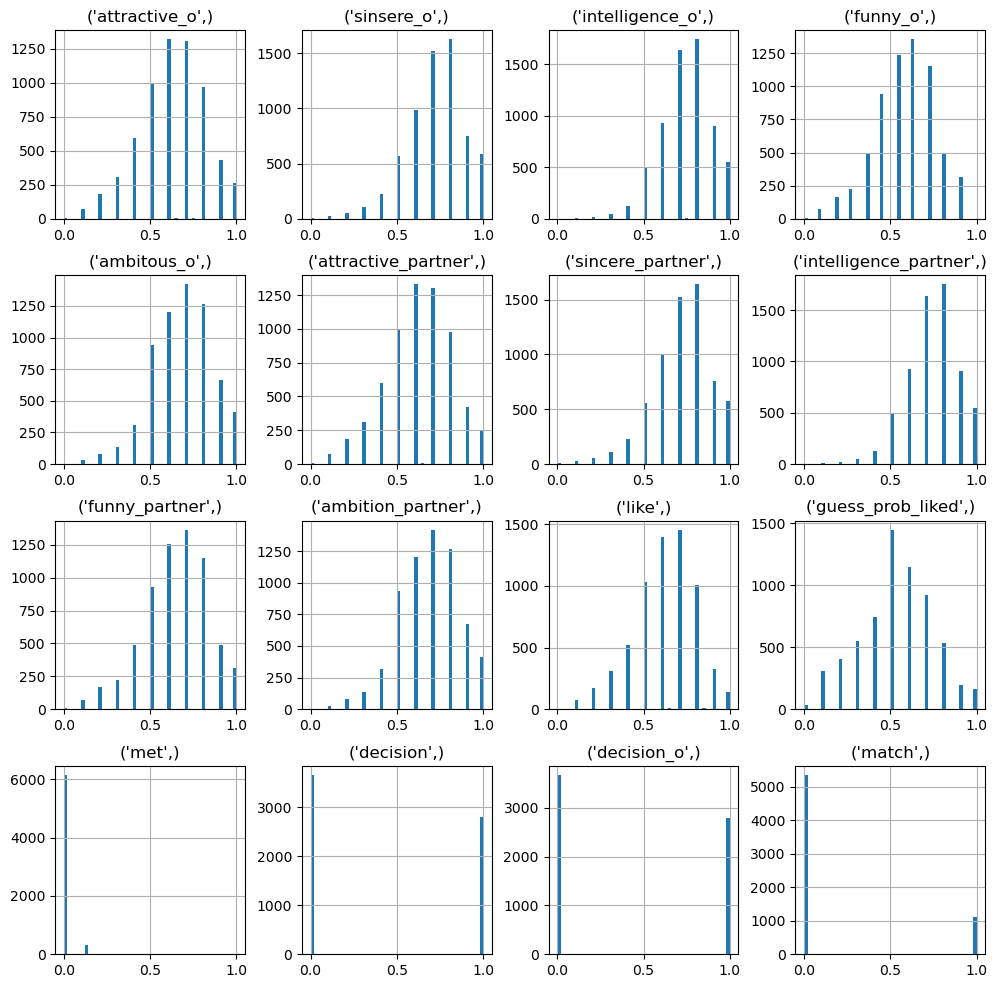

In [46]:
# check distributions after scaling

df_scaled.hist(bins=50, figsize=(12,12))
plt.savefig("output/distributions_scaled.png")
plt.show()

Choose Measure of Performance
RMSE: Root mean square error - measure of error made in predictions - higher weight is higher error
MAE: Mean absolute error aka average absolute deviation - use in case of many outliers

In [47]:
# linear regression

reg_all = LinearRegression()
reg_all.fit(train_X, train_y)
y_pred = reg_all.predict(test_X)

# r-squared
r_squared = reg_all.score(test_X, test_y)

# root mean squared error
rmse = mean_squared_error(test_y, y_pred, squared=False)

print("R^2:{}".format(r_squared))
print("RMSE:{}".format(rmse))

R^2:0.5872715685547534
RMSE:0.24348826148205274


Explainable error is 24.3%, model is only ~58.7% accurate.

In [48]:
# Ridge Regression
scores = []
for alpha in [0.1, 1.0, 10.0, 100.0, 1000.0]:
    ridge = Ridge(alpha=alpha)
    ridge.fit(train_X, train_y)
    y_pred = ridge.predict(test_X)
    scores.append(ridge.score(test_X, test_y))
print(scores)

scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

[0.5873110776224956, 0.5875554211334479, 0.5875081875626723, 0.5819127948808673, 0.47132860317209735]
Mean MAE: 0.563 (0.046)


No notable change with implementing Ridge Regression.

In [49]:
# Grid Search

steps = [('scaler', StandardScaler()),('knn', KNeighborsClassifier())]
pipeline = Pipeline(steps)
parameters = {"knn__n_neighbors": np.arange(1, 50)}
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=21)
y_train = np.ravel(y_train)

cv = GridSearchCV(pipeline, param_grid=parameters)
cv.fit(X_train, y_train)
y_pred = cv.predict(X_test)

print(cv.best_score_)
print(cv.best_params_)

0.9953591418346275
{'knn__n_neighbors': 10}


In [50]:
# RandomizedSearchCV

kf = KFold(n_splits=5, shuffle=True, random_state=42)
param_grid = {'alpha': np.arange(0.0001, 1, 10), "solver": ['sag', 'lsqr']}
ridge = Ridge()
ridge_cv = RandomizedSearchCV(ridge, param_grid, cv=kf, n_iter=2)
ridge_cv.fit(train_X, train_y)
print(ridge_cv.best_params_, ridge_cv.best_score_)

test_score = ridge_cv.score(test_X, test_y)
print(test_score)

{'solver': 'lsqr', 'alpha': 0.0001} 0.5805533848397244
0.5873665362518505


Try with all of the data

In [51]:
# try to convert pandas series index to list

list_features = df3.columns
list_feat = list_features.tolist()

# remove last element from list (match)
predictors = list_feat[:-1]
predictors

['wave',
 'gender',
 'age',
 'age_o',
 'd_age',
 'samerace',
 'importance_same_race',
 'importance_same_religion',
 'pref_o_attractive',
 'pref_o_sincere',
 'pref_o_intelligence',
 'pref_o_funny',
 'pref_o_ambitious',
 'pref_o_shared_interests',
 'attractive_o',
 'sinsere_o',
 'intelligence_o',
 'funny_o',
 'ambitous_o',
 'attractive_important',
 'sincere_important',
 'intellicence_important',
 'funny_important',
 'ambtition_important',
 'shared_interests_important',
 'attractive',
 'sincere',
 'intelligence',
 'funny',
 'ambition',
 'attractive_partner',
 'sincere_partner',
 'intelligence_partner',
 'funny_partner',
 'ambition_partner',
 'sports',
 'tvsports',
 'exercise',
 'dining',
 'museums',
 'art',
 'hiking',
 'gaming',
 'clubbing',
 'reading',
 'tv',
 'theater',
 'movies',
 'concerts',
 'music',
 'shopping',
 'yoga',
 'interests_correlate',
 'expected_happy_with_sd_people',
 'like',
 'guess_prob_liked',
 'met',
 'decision',
 'decision_o']

In [52]:
# standardize the data

scaler = MinMaxScaler()
 
df_scaled = scaler.fit_transform(df3.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=[list_feat])
 
print("Scaled Dataset Using MinMaxScaler")
df_scaled.head()

Scaled Dataset Using MinMaxScaler


,wave,gender,age,age_o,d_age,samerace,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,...,shopping,yoga,interests_correlate,expected_happy_with_sd_people,like,guess_prob_liked,met,decision,decision_o,match
0,0.0,0.0,0.081081,0.243243,0.18750,0.0,0.2,0.333333,0.35,0.425532,...,0.777778,0.1,0.557471,0.222222,0.7,0.6,0.000,1.0,0.0,0.0
1,0.0,0.0,0.081081,0.108108,0.03125,0.0,0.2,0.333333,0.60,0.000000,...,0.777778,0.1,0.787356,0.222222,0.7,0.5,0.125,1.0,0.0,0.0
2,0.0,0.0,0.081081,0.135135,0.06250,0.0,0.2,0.333333,0.30,0.106383,...,0.777778,0.1,0.827586,0.222222,0.7,0.6,0.000,1.0,1.0,1.0
3,0.0,0.0,0.081081,0.162162,0.09375,0.0,0.2,0.333333,0.30,0.212766,...,0.777778,0.1,0.597701,0.222222,0.6,0.6,0.000,1.0,1.0,1.0
4,0.0,0.0,0.081081,0.189189,0.12500,0.0,0.2,0.333333,0.50,0.000000,...,0.777778,0.1,0.620690,0.222222,0.6,0.5,0.000,0.0,1.0,0.0


In [53]:
#define predictor and response variables

X = df_scaled[predictors]
y = df_scaled["match"]

print(X.head())
print(y.head())

  wave gender       age     age_o    d_age samerace importance_same_race  \
0  0.0    0.0  0.081081  0.243243  0.18750      0.0                  0.2   
1  0.0    0.0  0.081081  0.108108  0.03125      0.0                  0.2   
2  0.0    0.0  0.081081  0.135135  0.06250      0.0                  0.2   
3  0.0    0.0  0.081081  0.162162  0.09375      0.0                  0.2   
4  0.0    0.0  0.081081  0.189189  0.12500      0.0                  0.2   

  importance_same_religion pref_o_attractive pref_o_sincere  ...     music  \
0                 0.333333              0.35       0.425532  ...  0.888889   
1                 0.333333              0.60       0.000000  ...  0.888889   
2                 0.333333              0.30       0.106383  ...  0.888889   
3                 0.333333              0.30       0.212766  ...  0.888889   
4                 0.333333              0.50       0.000000  ...  0.888889   

   shopping yoga interests_correlate expected_happy_with_sd_people like  \

In [54]:
np.random.seed(42)

# Split into 80% train and 20% test set. 
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = .2, random_state=42)

In [55]:
# linear regression

reg_all = LinearRegression()
reg_all.fit(train_X, train_y)
y_pred = reg_all.predict(test_X)

# r-squared
r_squared = reg_all.score(test_X, test_y)

# root mean squared error
rmse = mean_squared_error(test_y, y_pred, squared=False)

print("R^2:{}".format(r_squared))
print("RMSE:{}".format(rmse))

R^2:0.5841624865649637
RMSE:0.2444036389904455


In [56]:
# Ridge Regression
scores = []
for alpha in [0.1, 1.0, 10.0, 100.0, 1000.0]:
    ridge = Ridge(alpha=alpha)
    ridge.fit(train_X, train_y)
    y_pred = ridge.predict(test_X)
    scores.append(ridge.score(test_X, test_y))
print(scores)

scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

[0.584199378714972, 0.5844500701992399, 0.584982844515447, 0.5817224355440466, 0.4711647905303331]
Mean MAE: 0.561 (0.045)


In [57]:
# Grid Search

steps = [('scaler', StandardScaler()),('knn', KNeighborsClassifier())]
pipeline = Pipeline(steps)
parameters = {"knn__n_neighbors": np.arange(1, 50)}
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=21)
y_train = np.ravel(y_train)

cv = GridSearchCV(pipeline, param_grid=parameters)
cv.fit(X_train, y_train)
y_pred = cv.predict(X_test)

print(cv.best_score_)
print(cv.best_params_)

0.8890191461329296
{'knn__n_neighbors': 21}


In [58]:
# RandomizedSearchCV

kf = KFold(n_splits=5, shuffle=True, random_state=42)
param_grid = {'alpha': np.arange(0.0001, 1, 10), "solver": ['sag', 'lsqr']}
ridge = Ridge()
ridge_cv = RandomizedSearchCV(ridge, param_grid, cv=kf, n_iter=2)
ridge_cv.fit(train_X, train_y)
print(ridge_cv.best_params_, ridge_cv.best_score_)

test_score = ridge_cv.score(test_X, test_y)
print(test_score)

{'solver': 'sag', 'alpha': 0.0001} 0.5803776707182198
0.5841463728663991


Multiple regression of highly correlated features

In [59]:
mod = ols(formula="match ~ attractive_o + sinsere_o + intelligence_o + funny_o + ambitous_o + attractive_partner + sincere_partner + intelligence_partner + funny_partner + ambition_partner + like + guess_prob_liked + met + decision + decision_o", data=df4)
res = mod.fit()

# write summary to text file
with open('output/summary.txt', 'w') as fh:
    fh.write(res.summary().as_text())

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  match   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.585
Method:                 Least Squares   F-statistic:                     608.4
Date:                Wed, 10 May 2023   Prob (F-statistic):               0.00
Time:                        11:32:23   Log-Likelihood:                -25.323
No. Observations:                6466   AIC:                             82.65
Df Residuals:                    6450   BIC:                             191.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.2326 